In [19]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import PIL
print(PIL.__version__)
import pickle as pkl

KeyboardInterrupt: 

In [ ]:
from PIL import Image
# Test a single image path
test_image_path = "dataset/COVID_/Images/137covid_patient1_SR_2_IM00010.tif"  # Replace with an actual path
img = Image.open(test_image_path)
img.show()  # To display the image
print(img.format, img.size, img.mode) 

TIFF (512, 512) I;16


In [ ]:
features = np.load('features/all_features.npy')
labels = np.load('features/all_labels.npy', allow_pickle=True)
scaler = pkl.load(open('scaler.pkl','rb'))

fs = scaler.transform(features)


X_train, X_test, y_train, y_test = train_test_split(fs, labels, test_size=0.2, random_state=42)

In [ ]:
features.shape

(12058, 2048)

In [ ]:
svm = SVC(kernel='linear', C=1) 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       covid       0.94      0.93      0.94       455
      normal       0.98      0.99      0.99      1957

    accuracy                           0.98      2412
   macro avg       0.96      0.96      0.96      2412
weighted avg       0.98      0.98      0.98      2412

0.9759535655058044
[[ 425   30]
 [  28 1929]]


In [ ]:
rf = pkl.load(open('randomForest.pkl', 'rb'))
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       covid       0.98      0.71      0.83       455
      normal       0.94      1.00      0.97      1957

    accuracy                           0.94      2412
   macro avg       0.96      0.85      0.90      2412
weighted avg       0.95      0.94      0.94      2412

0.943200663349917
[[ 323  132]
 [   5 1952]]


In [ ]:
s = pd.Series(y_test)
print(s.value_counts())

normal    1957
covid      455
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       covid       0.97      0.92      0.94       455
      normal       0.98      0.99      0.99      1957

    accuracy                           0.98      2412
   macro avg       0.98      0.96      0.97      2412
weighted avg       0.98      0.98      0.98      2412

0.9792703150912107
[[ 418   37]
 [  13 1944]]


In [ ]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       covid       0.75      0.71      0.73       455
      normal       0.93      0.94      0.94      1957

    accuracy                           0.90      2412
   macro avg       0.84      0.83      0.83      2412
weighted avg       0.90      0.90      0.90      2412

0.8996683250414593
[[ 321  134]
 [ 108 1849]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       covid       0.95      0.78      0.86       455
      normal       0.95      0.99      0.97      1957

    accuracy                           0.95      2412
   macro avg       0.95      0.89      0.91      2412
weighted avg       0.95      0.95      0.95      2412

0.951077943615257
[[ 355  100]
 [  18 1939]]


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')  # Global average pooling

# Function to Extract Features
def extract_features(image_path):
    img = Image.open(image_path).convert('RGB')  # Resize image
    img_array = img_to_array(img)  # Convert to array
    img_array = preprocess_input(img_array)  # Preprocess for ResNet
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array)  # Extract features
    return features.flatten()  # Flatten to 1D array

In [ ]:
feature = extract_features('dataset/New_Data_CoV2/Covid/Patient/1.png')
feature

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.64957297, 0.11356775, ..., 0.22981372, 0.24619743,
       0.04094076], dtype=float32)

In [ ]:
fs = scaler.transform([feature])
y = log.predict(fs)
y

array(['covid'], dtype=object)

In [ ]:
from glob import glob
files = glob('dataset/New_Data_CoV2/Healthy/Patient/*.png')
features = [extract_features(file) for file in files]
fs = scaler.transform(features)
y = log.predict(fs)
s = pd.Series(y)
res = s.value_counts()
print(res)
res ='covid' if (res['covid']>res['normal']) else 'normal'
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
normal    12
covid      1
Name: count, dtype: int64


'normal'

In [ ]:
feat3 = np.load(r'F:\Sem 6\DSA\Lab\Covid19Predictor\features\3class_features.npy')
label3 = np.load(r'F:\Sem 6\DSA\Lab\Covid19Predictor\features\3class_labels.npy')

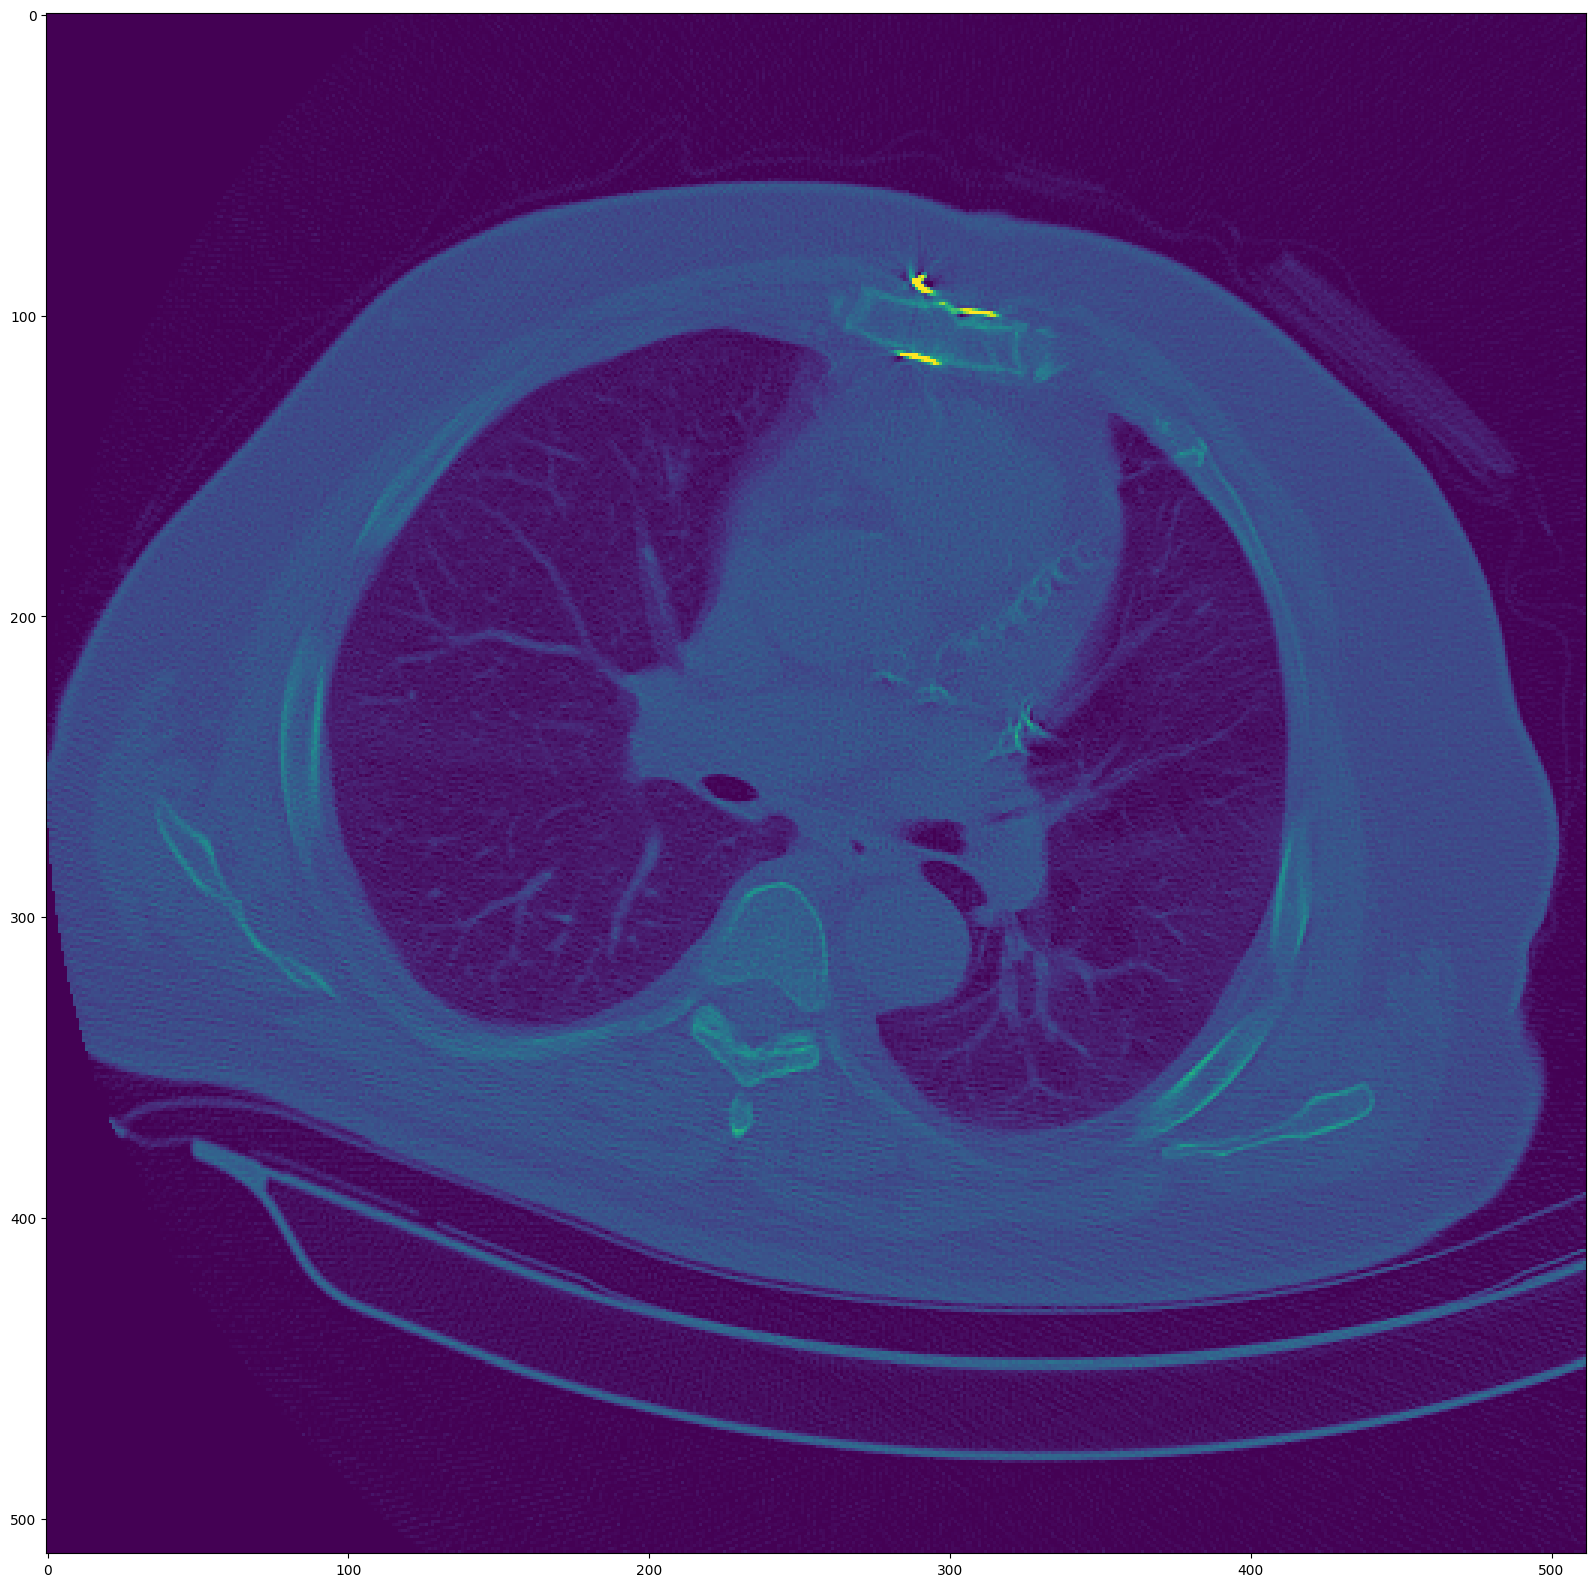

In [ ]:
### *ECG ANALYSIS SAMPLE*
#### *LOADING IMAGE FILE*
from PIL import Image
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=Image.open(r'dataset\COVID_\Images\137covid_patient3_SR_2_IM00026.tif')

ax0.imshow(image)
plt.show()

In [ ]:
from PIL import Image
import numpy as np

# Open the image with Pillow
image_pil = Image.open('dataset/COVID_/Images/137covid_patient3_SR_2_IM00026.tif')

# Print image details
print(f"Mode: {image_pil.mode}, Size: {image_pil.size}, Format: {image_pil.format}")

np.savetxt('pixels.txt', image_pil, fmt='%d')

Mode: I;16, Size: (512, 512), Format: TIFF


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r'dataset\COVID_\Images\137covid_patient1_SR_2_IM00012.tif', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a mask
_, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the lung region
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the largest contour (assuming lung is the largest object)
lung_mask = np.zeros_like(gray)
cv2.drawContours(lung_mask, contours, -1, 255, thickness=cv2.FILLED)

# Apply the mask to isolate the lung region
isolated_lung = cv2.bitwise_and(image, image, mask=lung_mask)

# Create a blurred version of the original image
blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

# Combine the blurred edges with the isolated lung
combined = np.where(lung_mask[..., None] == 255, isolated_lung, blurred_image)

# Save or display the result
cv2.imwrite('processed_lung_ct.jpg', combined)
cv2.imshow('Processed Lung CT', combined)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
from PIL import Image

# Load the image into a NumPy array
img = np.array(Image.open('dataset/COVID_/Images/137covid_patient3_SR_2_IM00026.tif'))

# Get the height and width of the image
height, width = img.shape[:2]

# Calculate the midpoint coordinates
mid_h, mid_w = height // 2, width // 2

# Slice into 4 quadrants
top_left = img[:mid_h, :mid_w]        # Top-left quadrant
top_right = img[:mid_h, mid_w:]       # Top-right quadrant
bottom_left = img[mid_h:, :mid_w]     # Bottom-left quadrant
bottom_right = img[mid_h:, mid_w:]    # Bottom-right quadrant

# Print the shapes to verify
print("Top Left:", top_left.shape)
print("Top Right:", top_right.shape)
print("Bottom Left:", bottom_left.shape)
print("Bottom Right:", bottom_right.shape)


Top Left: (256, 256)
Top Right: (256, 256)
Bottom Left: (256, 256)
Bottom Right: (256, 256)


1 	 4
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


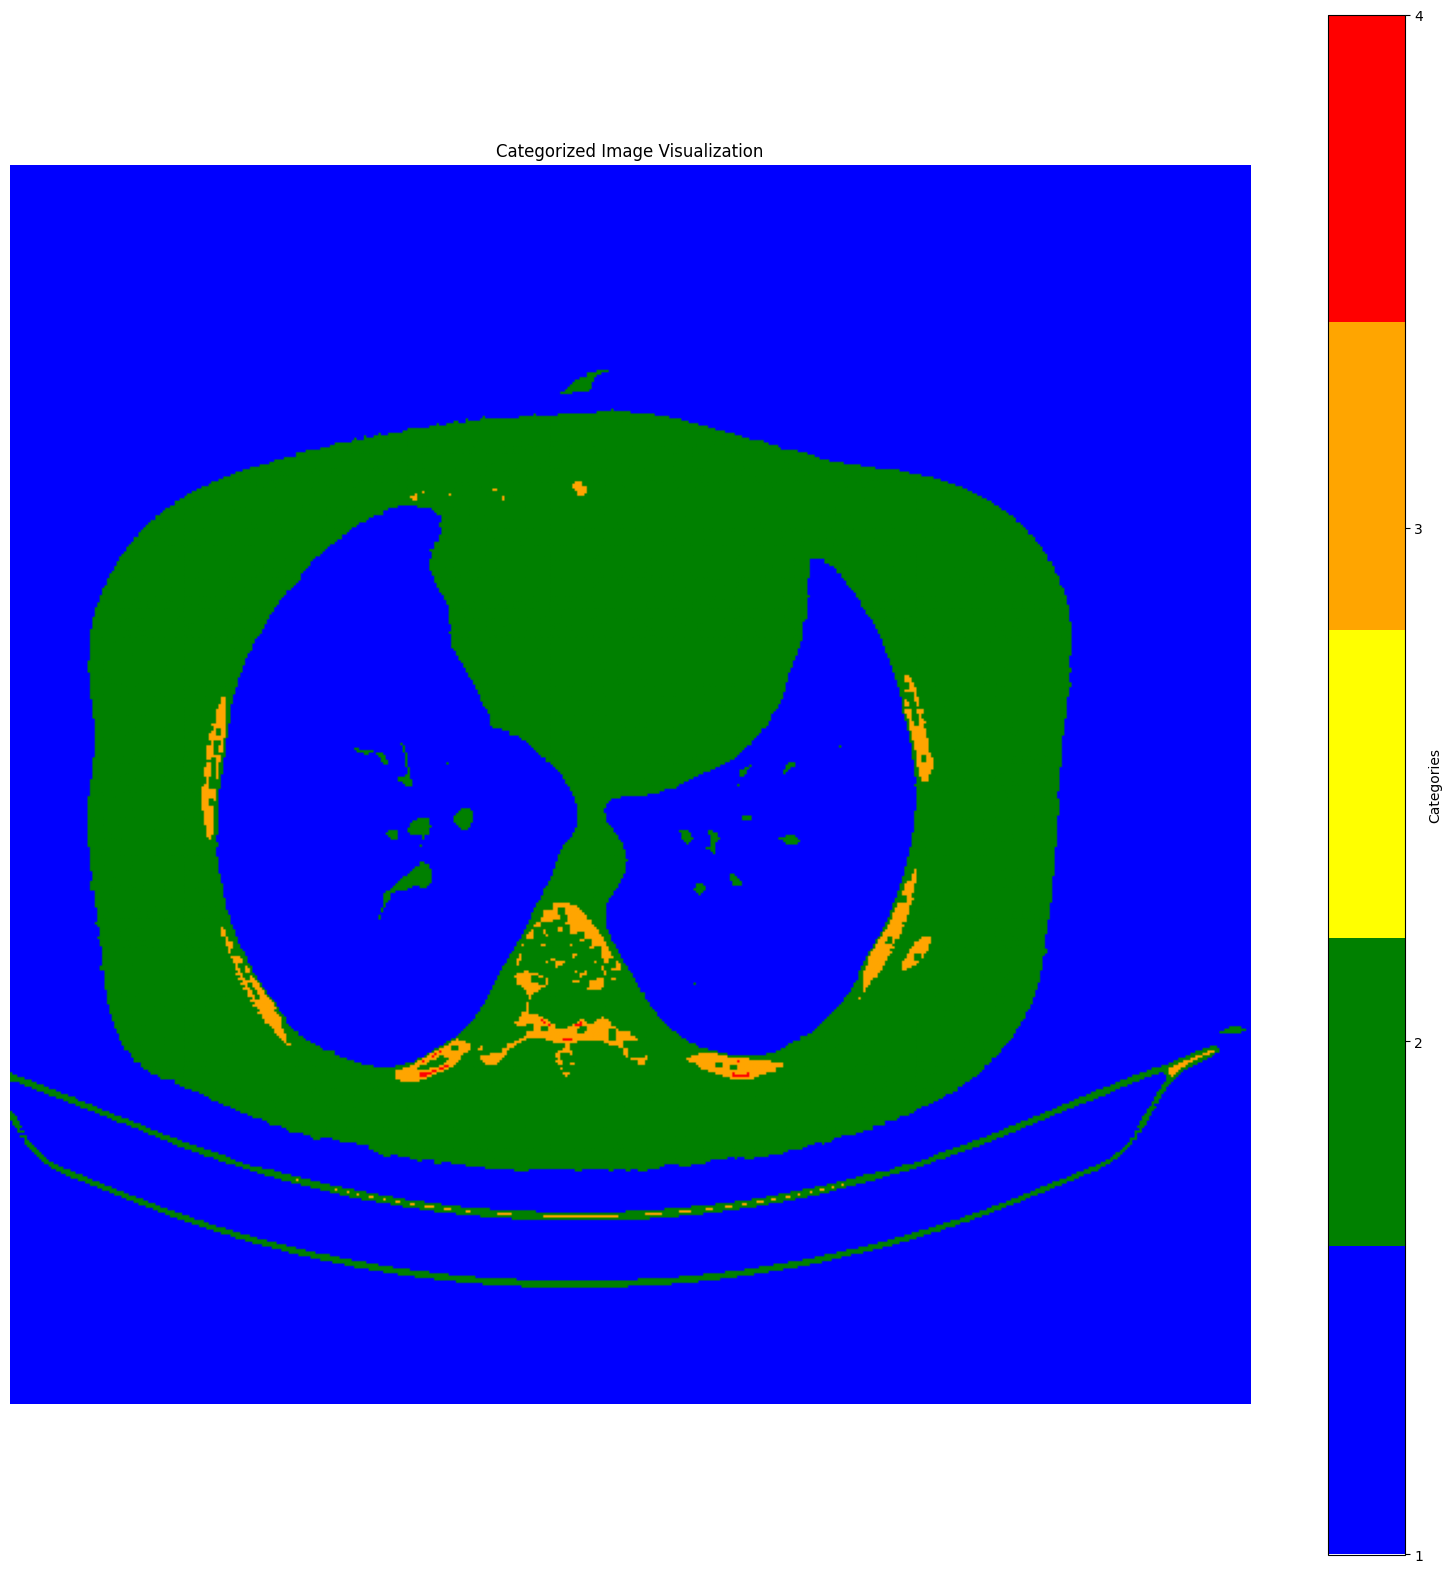

In [173]:
import numpy as np
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter

# Load the grayscale image as a NumPy array
img = np.array(Image.open(r'F:\Sem 6\DSA\Lab\Covid19Predictor\dataset\COVID_\Images\137covid_patient1_SR_2_IM00022.tif'))
# Define a custom colormap or use a predefined one (e.g., 'viridis', 'jet', 'plasma')
# Here is an example of creating a colormap with 5 specific categories:
cmap = ListedColormap(["blue", "green", "yellow", "orange", "red"])
# Normalize the pixel values into discrete bins for categorization
# Example: Divide into 5 categories based on intensity
categories = np.digitize(img, bins=np.linspace(img.min(), img.max(), num=6))
from scipy.ndimage import gaussian_filter
smoothed_categories = gaussian_filter(categories, sigma=0.2)
print(smoothed_categories.min(), '\t', smoothed_categories.max())
# Optionally, re-categorize after smoothing (if needed for distinct categories)
cat1 = np.digitize(smoothed_categories, bins=np.linspace(smoothed_categories.min(), smoothed_categories.max(), num=smoothed_categories.max()))
print(cat1)
print(categories)
# Plot the image with the colormap
plt.figure(figsize=(20, 20))
plt.imshow(cat1, cmap=cmap)
plt.colorbar(ticks=range(1, 6), label='Categories')
plt.title('Categorized Image Visualization')
plt.axis('off')
plt.show()

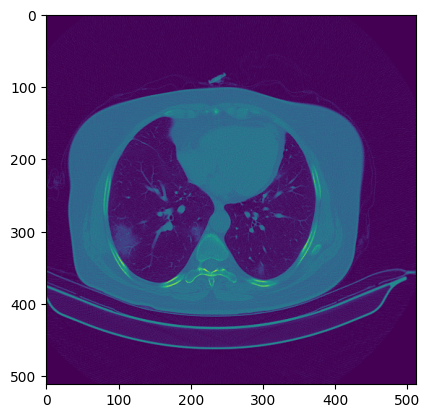

In [174]:
plt.imshow(img)
plt.show()

In [175]:
def reduceImg(i,j,categories):
    stack = [(i, j)]

    while stack:
        x, y = stack.pop()
        # Set the current cell to 1
        categories[x][y] = 0

        # Check the 4 neighboring cells (up, down, left, right)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            # Ensure we stay within bounds and process only valid cells
            if 0 <= nx < categories.shape[0] and 0 <= ny < categories.shape[1]:
                if  categories[nx][ny] == 1:  # Only visit cells greater than 1
                    stack.append((nx, ny))
    return

In [176]:
print(cat1.min(), '\t', cat1.max())
cat2 = gaussian_filter(cat1, sigma=0.2)
print(cat2.min(), '\t', cat2.max())

1 	 4
1 	 3


In [177]:
for i in range(len(categories)):
    for j in range(len(categories[i])):
        if (cat1[i][j]==1):
            reduceImg(i,j,cat2)
            break

print(cat2.tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

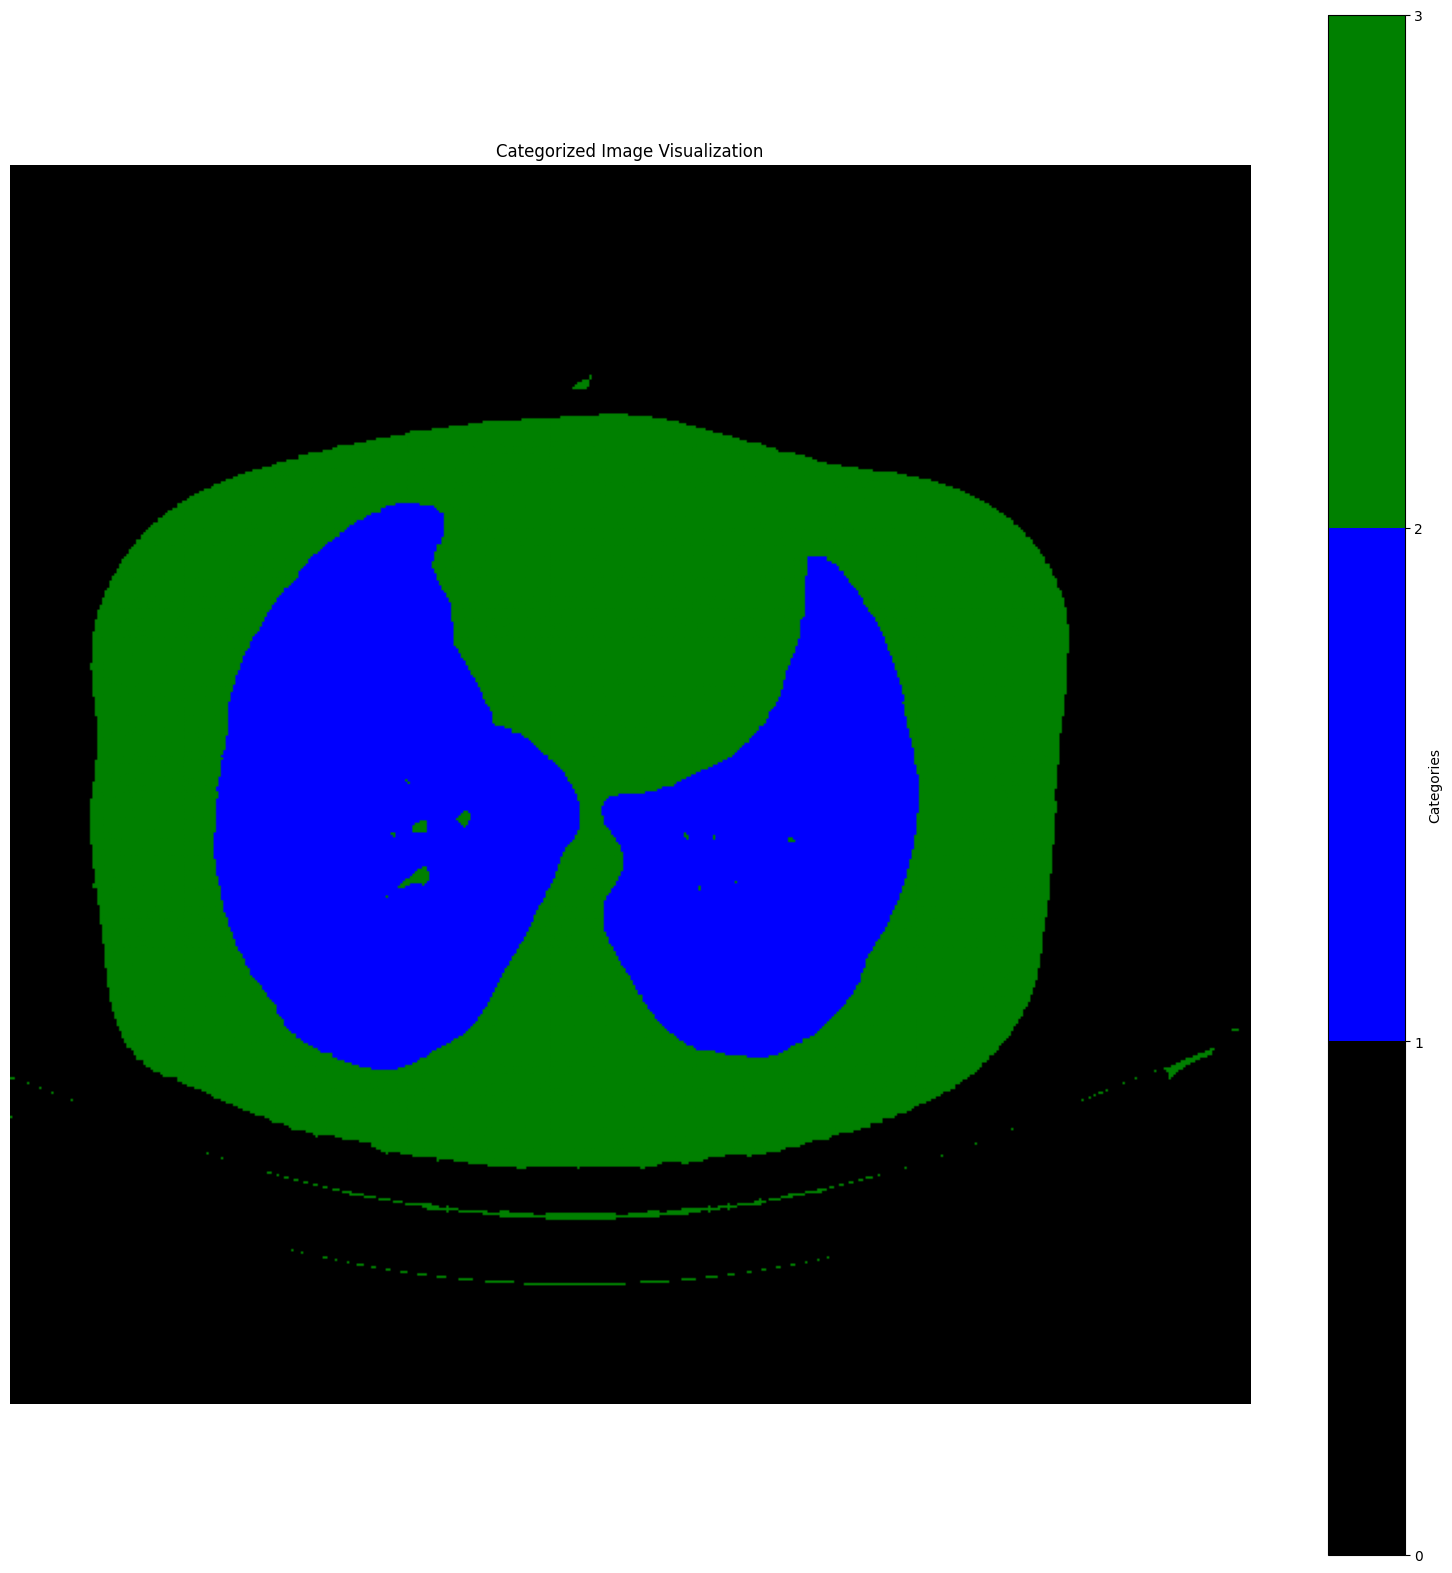

In [178]:
cmap = ListedColormap(["black","blue", "green"])
plt.figure(figsize=(20, 20))
plt.imshow(cat2, cmap=cmap)
plt.colorbar(ticks=range(0, 6), label='Categories')
plt.title('Categorized Image Visualization')
plt.axis('off')
plt.show()

In [179]:
def reduceImg2(i,j,categories):
    stack = [(i, j)]

    while stack:
        x, y = stack.pop()
        # Set the current cell to 1
        categories[x][y] = 0

        # Check the 4 neighboring cells (up, down, left, right)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            # Ensure we stay within bounds and process only valid cells
            if 0 <= nx < categories.shape[0] and 0 <= ny < categories.shape[1]:
                if categories[nx][ny] >= 2:  # Only visit cells greater than 1
                    stack.append((nx, ny))
    return


In [180]:
cat3 = cat2
for i in range(len(cat3)):
    for j in range(len(cat3[i])):
        if (cat3[i][j]>=2):
            reduceImg2(i,j,cat3)
            break
print(cat3.min(), '\t', cat3.max())

0 	 2


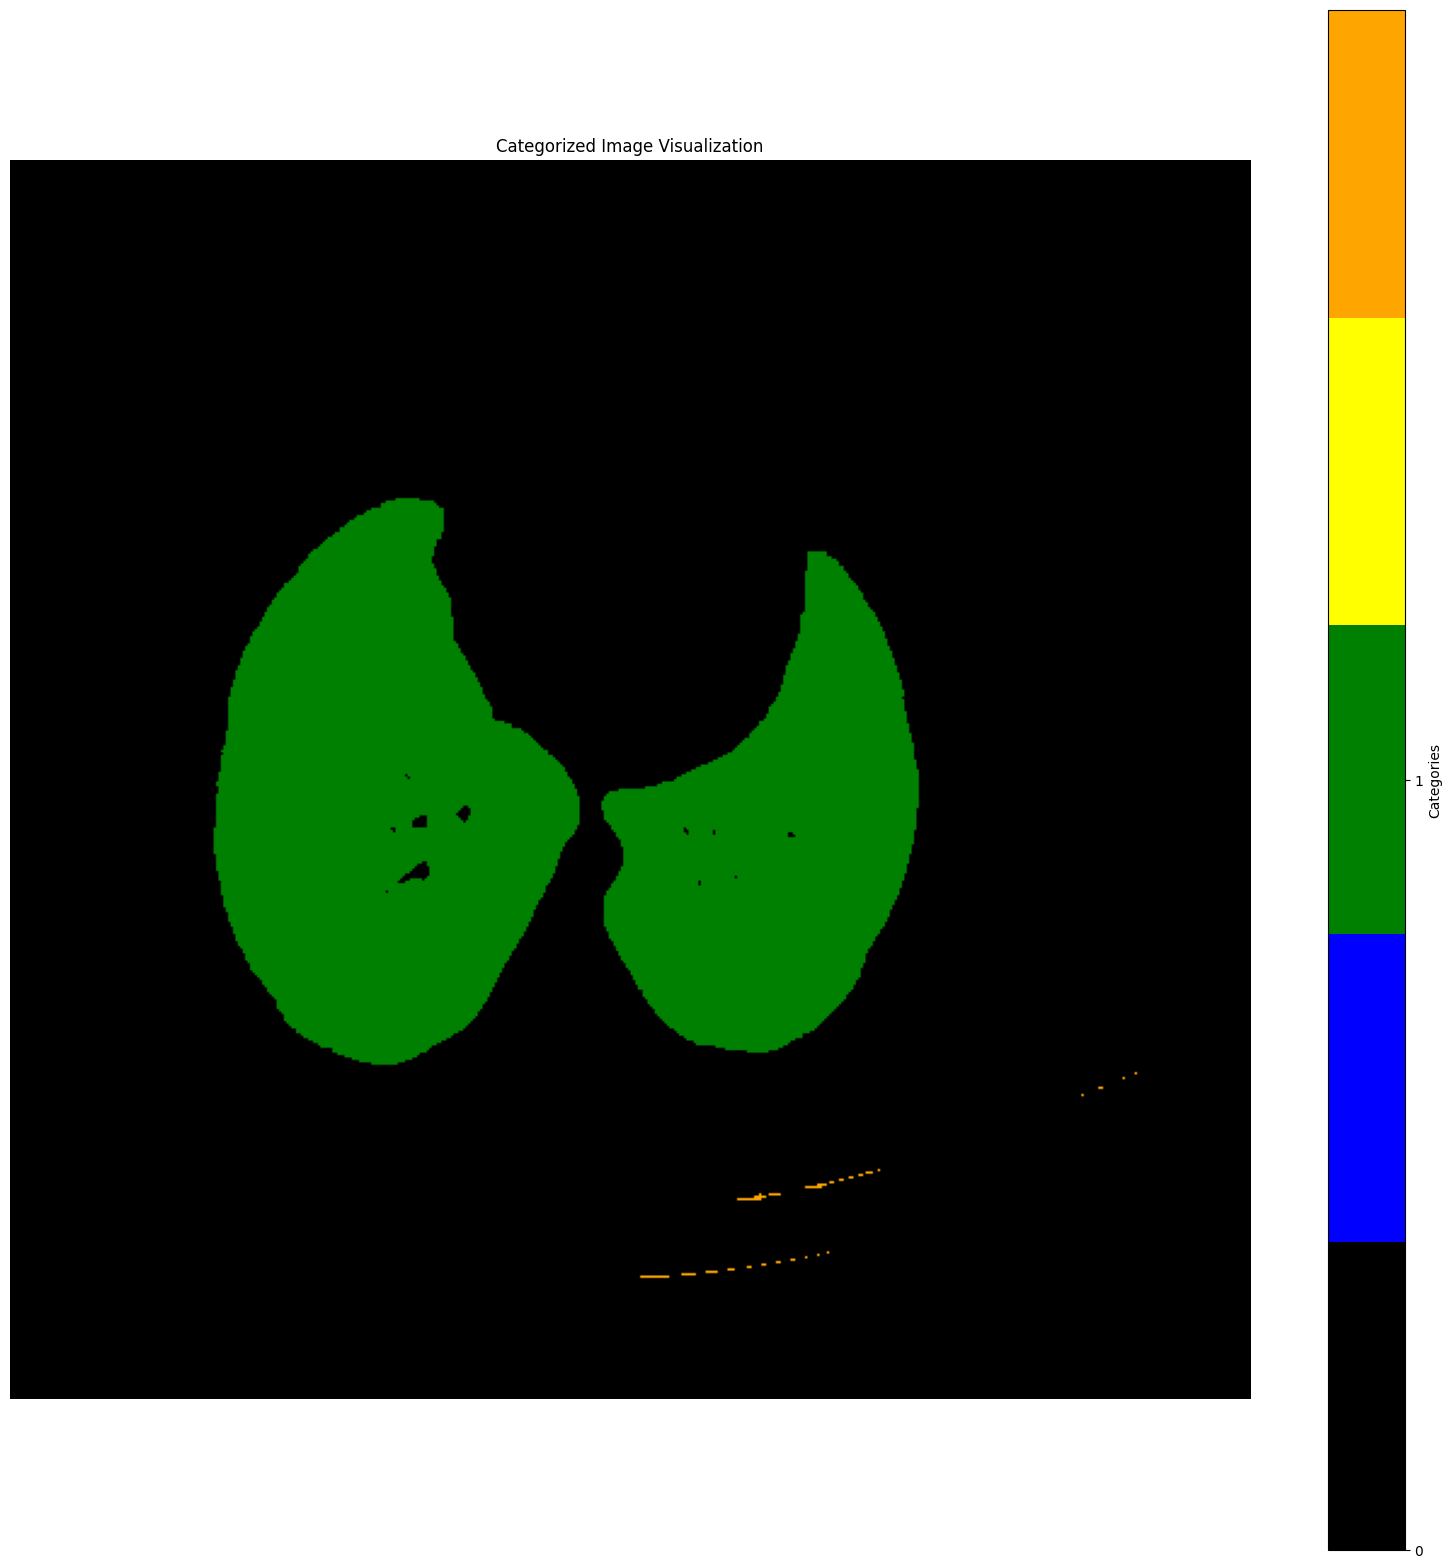

In [181]:
cmap = ListedColormap(["black","blue", "green","yellow","orange"])
plt.figure(figsize=(20, 20))
plt.imshow(cat3, cmap=cmap)
plt.colorbar(ticks=range(cat3.min(), cat3.max()), label='Categories')
plt.title('Categorized Image Visualization')
plt.axis('off')
plt.show()

In [182]:
i = 0
f=0
b=0
while i < len(cat3):
    if 1 in cat3[i]:
        if f==0:
            f=1
    else:
        if f==1:
            b = 1
    if b==1:
        cat3[i] = np.zeros(shape=cat3[i].shape)
    i=i+1


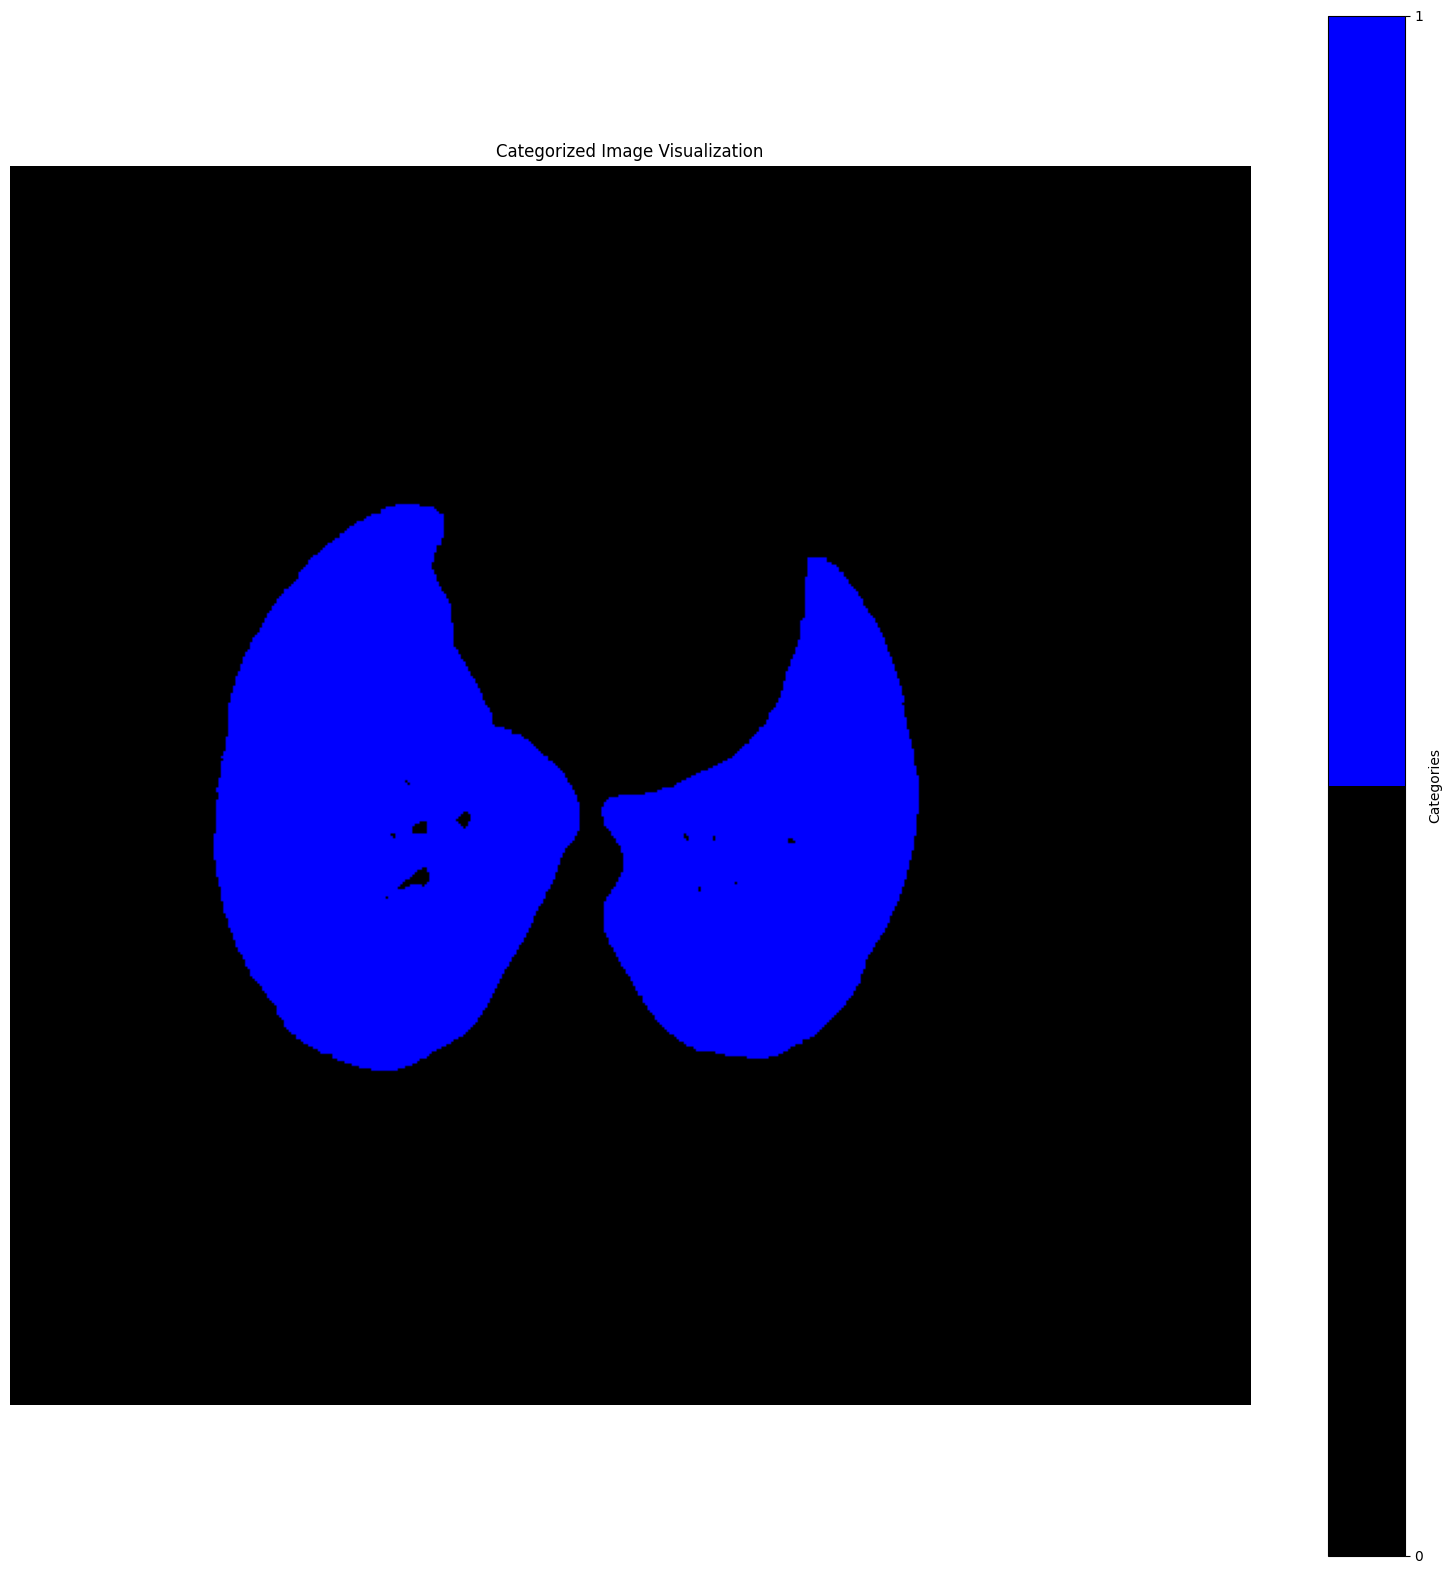

In [187]:
cmap = ListedColormap(["black","blue"])
plt.figure(figsize=(20, 20))
plt.imshow(cat3, cmap=cmap)
plt.colorbar(ticks=range(0, 6), label='Categories')
plt.title('Categorized Image Visualization')
plt.axis('off')
plt.show()

In [184]:
import numpy as np

def crop_to_mask(img: np.ndarray, mask: np.ndarray, pad: int = 0):
    """
    Crop `img` and `mask` to the minimal bounding box around mask>0 pixels,
    with an optional `pad` in pixels on each side.
    
    Parameters
    ----------
    img : np.ndarray
        The original image (H×W or H×W×C).
    mask : np.ndarray
        A binary mask of shape (H×W), zeros outside region of interest.
    pad : int
        How many extra pixels to include on each side of the box (default 0).
    
    Returns
    -------
    img_crop : np.ndarray
        Cropped version of `img`.
    mask_crop : np.ndarray
        Cropped version of `mask`.
    """
    # find all nonzero mask coords
    ys, xs = np.nonzero(mask)
    if len(xs) == 0 or len(ys) == 0:
        # nothing to crop—return originals
        return img, mask

    # compute bounding box
    x0, x1 = xs.min(), xs.max()
    y0, y1 = ys.min(), ys.max()

    # apply padding, clamped to image edges
    x0 = max(x0 - pad, 0)
    y0 = max(y0 - pad, 0)
    x1 = min(x1 + pad, mask.shape[1] - 1)
    y1 = min(y1 + pad, mask.shape[0] - 1)

    # slice out the ROI
    if img.ndim == 2:
        img_crop  = img[y0:y1+1, x0:x1+1]
    else:
        img_crop  = img[y0:y1+1, x0:x1+1, ...]
    mask_crop = mask[y0:y1+1, x0:x1+1]

    return img_crop, mask_crop


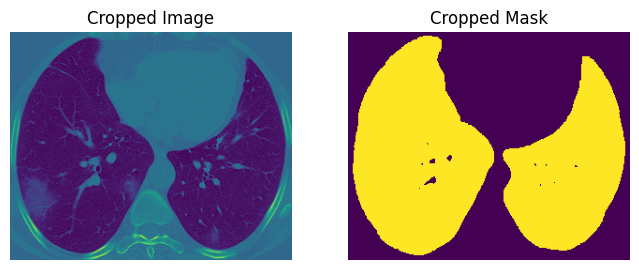

In [185]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
  # or whatever threshold & morphology gave you

# Crop them
img_crop, mask_crop = crop_to_mask(img, cat3, pad=5)

# Visualize
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(img_crop);      ax[0].set_title("Cropped Image"); ax[0].axis('off')
ax[1].imshow(mask_crop);     ax[1].set_title("Cropped Mask");  ax[1].axis('off')
plt.show()


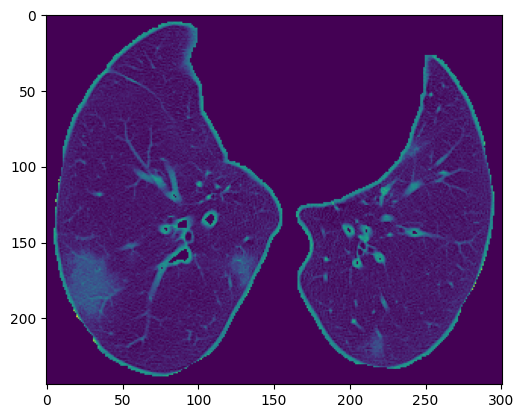

In [186]:
pimg = img_crop*mask_crop
plt.imshow(pimg)
plt.show()

In [161]:
def categorize(img):
    categories = np.digitize(img, bins=np.linspace(img.min(), img.max(), num=6))
    from scipy.ndimage import gaussian_filter
    smoothed_categories = gaussian_filter(categories, sigma=0.2)
    print(smoothed_categories.min(), '\t', smoothed_categories.max())
    cat1 = np.digitize(smoothed_categories, bins=np.linspace(smoothed_categories.min(), smoothed_categories.max(), num=4))
    return cat1

In [162]:
def reduceImg(i,j,categories):
    stack = [(i, j)]

    while stack:
        x, y = stack.pop()
        # Set the current cell to 1
        categories[x][y] = 0

        # Check the 4 neighboring cells (up, down, left, right)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            # Ensure we stay within bounds and process only valid cells
            if 0 <= nx < categories.shape[0] and 0 <= ny < categories.shape[1]:
                if  categories[nx][ny] == 1:  # Only visit cells greater than 1
                    stack.append((nx, ny))
    return

In [163]:
def preprocessLungCT(path):
    img = np.array(Image.open(r'dataset\COVID_\Images\normalcd3_patient434_SR_2_IM00024.tif'))
    cat1 = categorize(img)
    